# IO

In [1]:
from PineBioML import IO

In [2]:
# Path
input_folder = "./input/"
output_folder = "./output/"
export_title = "example_basic "

In [3]:
##### Read data method 1: read single file
##### index_col is the column of index of samples (or sample name).
##### If your data do not have such column, please set index_col=None
data = IO.read_file(input_folder+ "HAPTdata.csv", index_col=None)

##### pick the target label column
y = data["target"]

##### drop the target from dataframe, using the remaining to predict y (the target)
x = data.drop("target", axis = 1)

In [4]:
x.head(5)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column552,Column553,Column554,Column555,Column556,Column557,Column558,Column559,Column560,Column561
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849


In [5]:
y.value_counts()

target
STANDING              556
LAYING                545
SITTING               508
WALKING               496
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
STAND_TO_LIE           49
SIT_TO_LIE             32
LIE_TO_STAND           27
LIE_TO_SIT             25
STAND_TO_SIT           23
SIT_TO_STAND           10
Name: count, dtype: int64

# Preprocessing

In [6]:
from PineBioML.preprocessing import Normalizer

x = Normalizer(method="StandardScaler").fit_transform(x)

In [7]:
# Impute 0
from PineBioML.preprocessing import impute

# The imputer will drop the features with missing value more than 60%.
# Remaining will be filled by 0.
simple = impute.simple_imputer(threshold = 0.6, strategy = "constant")
x = simple.fit_transform(x)

# Data overview

In [8]:
import PineBioML.report.utils as report_utils

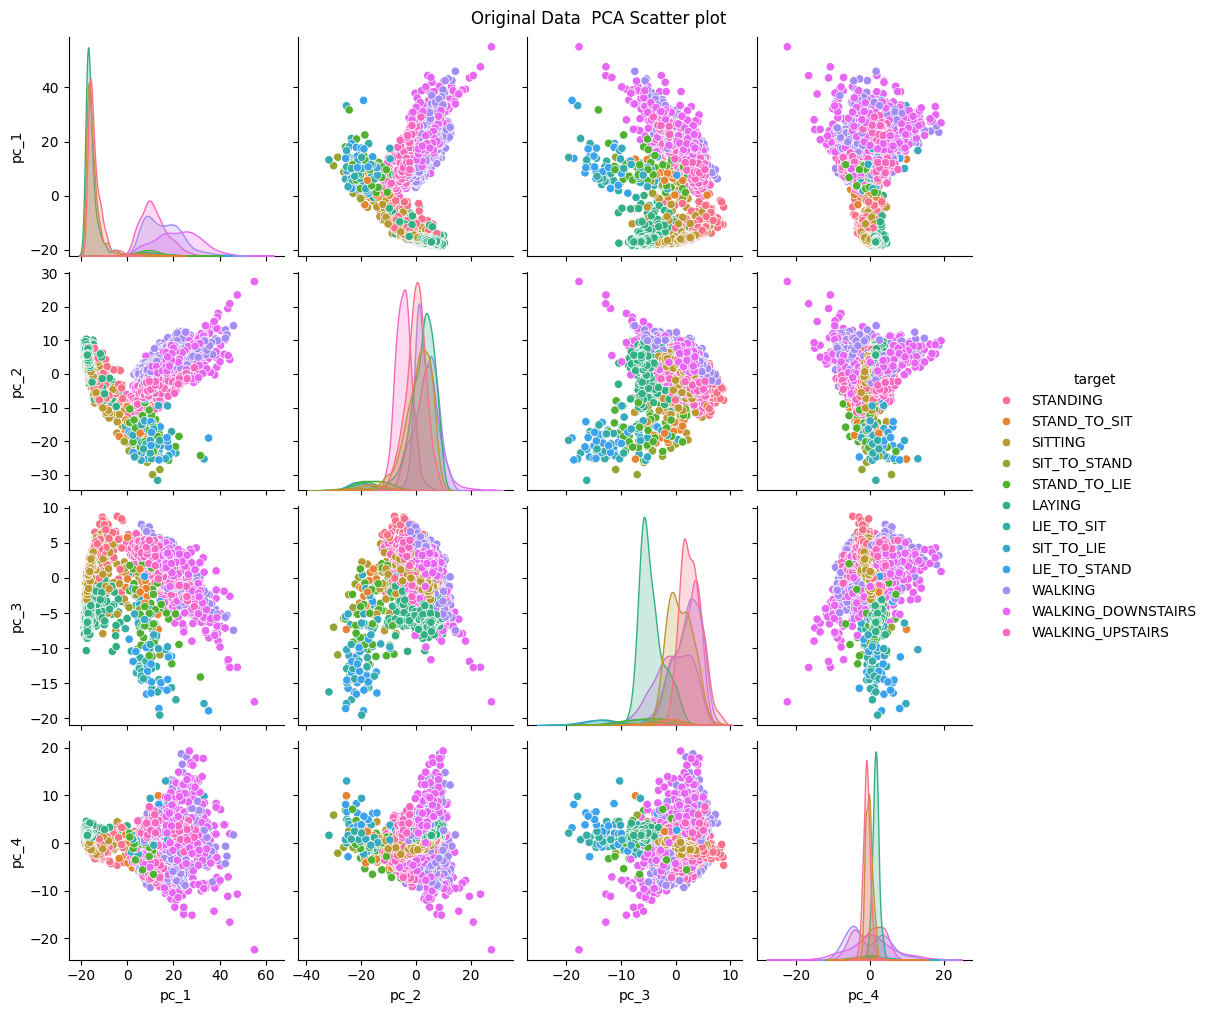

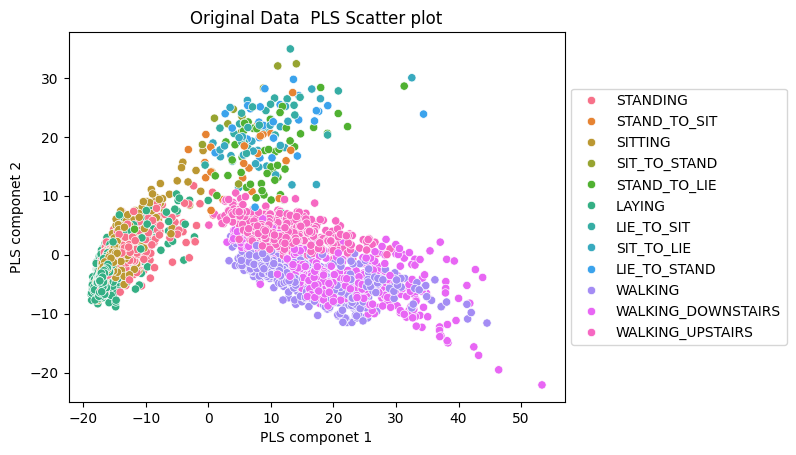

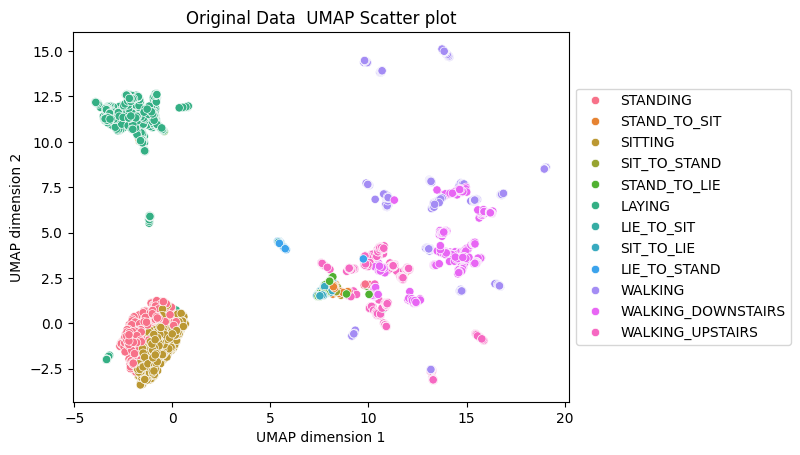

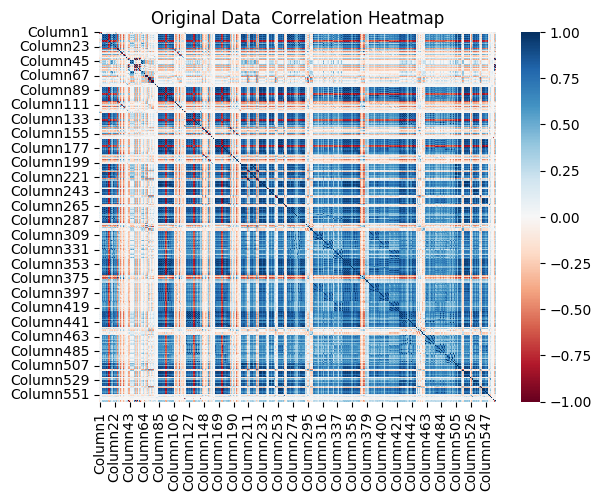

In [9]:
report_utils.data_overview(x, y, is_classification=True, prefix="Original Data ", save_fig=True, save_path="./output/images/", show_fig=True)

# Feature selection

In [10]:
from PineBioML.selection.classification import essemble_selector

In [11]:
# Use several way to select top-k important features, which includes decision tree, random forest, lasso, multi lasso, svm, adaboost, xgboost
ensemble_selector = essemble_selector(k = 10, z_importance_threshold=None)
important_feature, importance = ensemble_selector.Select(x, y) # if k = -1, it returns all the feature scores

Using  c45  to select.


100%|██████████| 561/561 [00:03<00:00, 151.29it/s]


c45  is done.

Using  RF_gini  to select.
RF_gini  is done.

Using  Lasso_Bisection  to select.
Lasso_Bisection  is done.

Using  multi_Lasso  to select.
multi_Lasso  is done.

Using  SVM  to select.
SVM  is done.

Using  AdaBoost  to select.
I don't have a progress bar but I am running


C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost  is done.

Using  XGboost  to select.
XGboost  is done.

Using  Lightgbm  to select.
Lightgbm  is done.



In [12]:
# The features that was selected by ML algoritms.
important_feature

,DT_score_c45,RandomForest_gini,LassoLinear,multi_Lasso,SVM,AdaBoost128,XGboost,Lightgbm
0,Column512,Column53,Column1,Column47,Column446,Column54,Column337,Column50
1,Column69,Column1,Column61,Column60,Column183,Column382,Column126,Column1
2,Column68,Column23,Column44,Column1,Column143,Column1,Column469,Column103
3,Column26,Column41,Column50,Column44,Column559,Column2,Column538,Column2
4,Column144,Column57,Column2,Column497,Column146,Column45,Column382,Column382
5,Column294,Column54,Column64,Column45,Column2,Column24,Column543,Column42
6,Column70,Column559,Column3,Column3,Column557,Column16,Column513,Column295
7,Column106,Column50,Column19,Column489,Column50,Column513,Column560,Column130
8,Column374,Column51,Column489,Column317,Column25,Column539,Column465,Column452
9,Column145,Column382,Column46,Column48,Column13,Column244,Column82,Column41


In [13]:
# The feature importance given by diffirent methods.
# Please Notice that the score between diffirent methods is not comparable.
importance

,DT_score_c45,RandomForest_gini,LassoLinear,multi_Lasso,SVM,AdaBoost128,XGboost,Lightgbm
Column512,0.705821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column69,0.702054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column68,0.701797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column26,0.701755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column144,0.701752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column294,0.701679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column70,0.701296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column106,0.701276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column374,0.701244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column145,0.701222,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
x = ensemble_selector.transform(x)

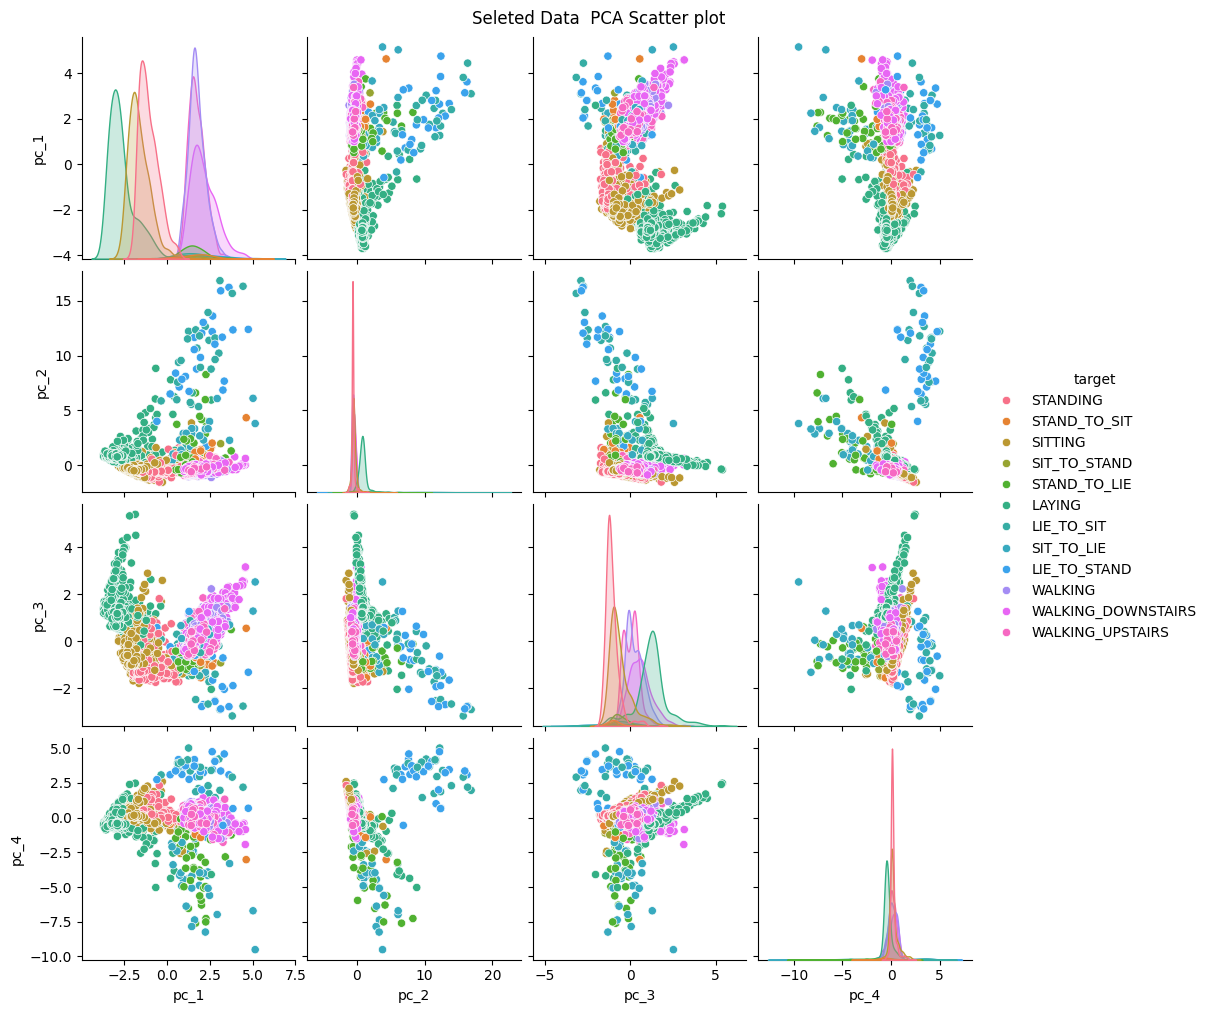

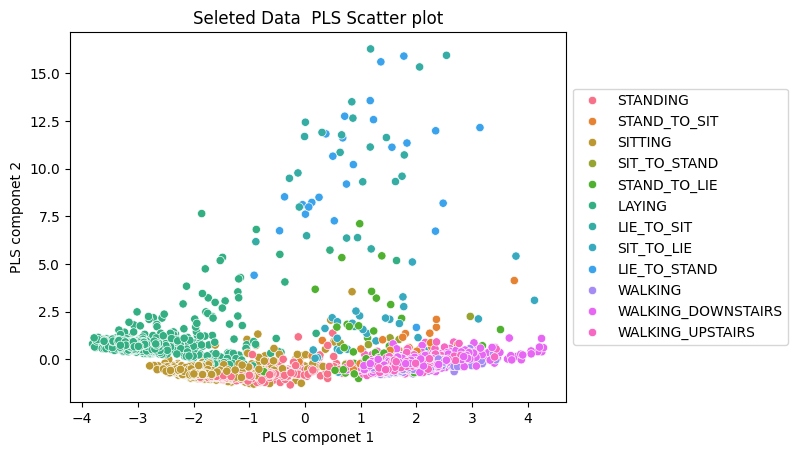

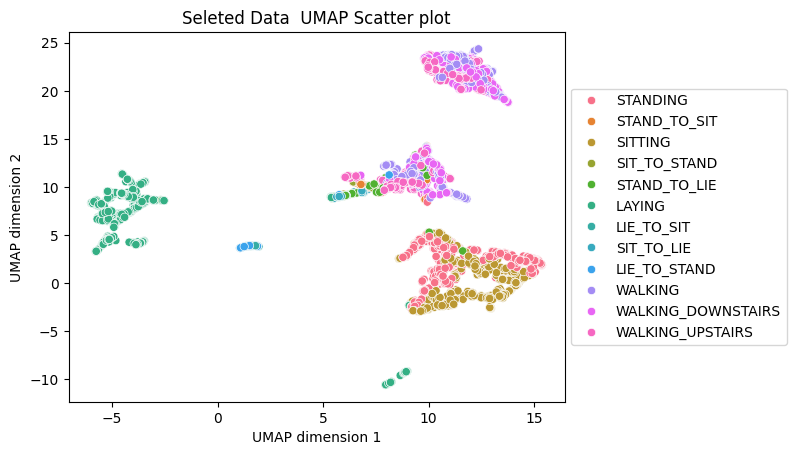

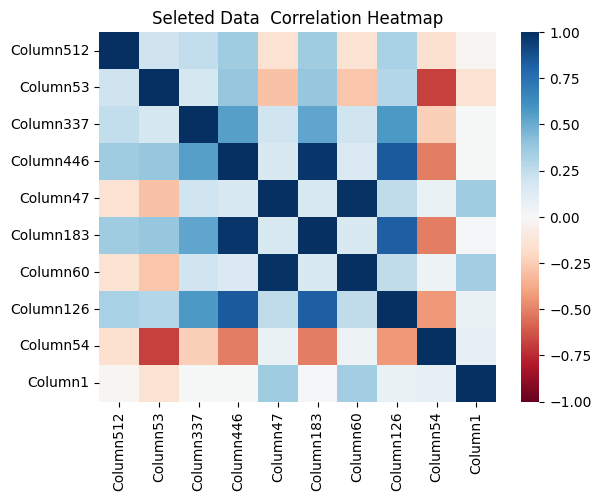

In [15]:
# Overviewing the top-5 features.
report_utils.data_overview(x, y, is_classification=True, prefix="Seleted Data ", save_fig=True, save_path="./output/images/", show_fig=True)

# Modeling

### Train test split

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=142, shuffle=True, stratify=y)

### Tuning a model

In [17]:
import PineBioML.model.supervised.Classification as tuner

optuna seed 3333  |  validation seed 222  |  model seed 11
    start tuning. it will take a while.
    default is better.

 
                    precision    recall  f1-score   support

            LAYING       0.99      0.99      0.99       180
        LIE_TO_SIT       0.67      0.50      0.57         8
      LIE_TO_STAND       0.50      0.44      0.47         9
           SITTING       0.94      0.91      0.92       168
        SIT_TO_LIE       0.64      0.70      0.67        10
      SIT_TO_STAND       0.00      0.00      0.00         3
          STANDING       0.92      0.94      0.93       184
      STAND_TO_LIE       0.44      0.44      0.44        16
      STAND_TO_SIT       0.44      0.50      0.47         8
           WALKING       0.84      0.88      0.86       164
WALKING_DOWNSTAIRS       0.80      0.74      0.77       139
  WALKING_UPSTAIRS       0.84      0.88      0.86       155

          accuracy                           0.88      1044
         macro avg       0.67    

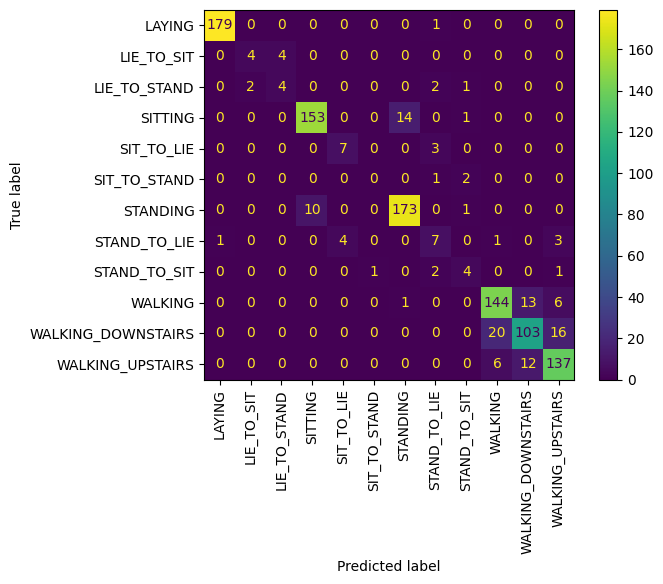

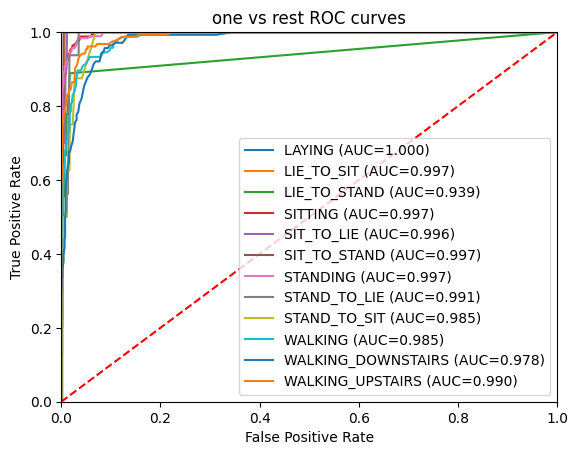

In [18]:
rf = tuner.RandomForest_tuner(target="f1_macro", kernel_seed=11, valid_seed = 222, optuna_seed = 3333).fit(x_train, y_train)
report_utils.classification_summary(y_valid, rf.predict_proba(x_valid))

optuna seed 3333  |  validation seed 222  |  model seed 11
    start tuning. it will take a while.
    optuna is better, best trial:  8

 
                    precision    recall  f1-score   support

            LAYING       0.98      1.00      0.99       180
        LIE_TO_SIT       0.46      0.75      0.57         8
      LIE_TO_STAND       0.33      0.11      0.17         9
           SITTING       0.92      0.85      0.88       168
        SIT_TO_LIE       0.55      0.60      0.57        10
      SIT_TO_STAND       0.50      0.33      0.40         3
          STANDING       0.87      0.93      0.90       184
      STAND_TO_LIE       0.44      0.44      0.44        16
      STAND_TO_SIT       0.50      0.12      0.20         8
           WALKING       0.78      0.87      0.82       164
WALKING_DOWNSTAIRS       0.77      0.70      0.73       139
  WALKING_UPSTAIRS       0.85      0.84      0.84       155

          accuracy                           0.85      1044
         macro avg 

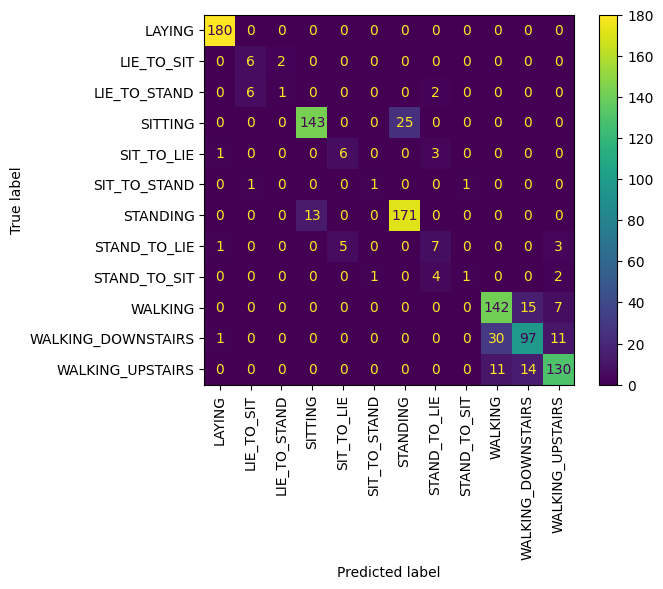

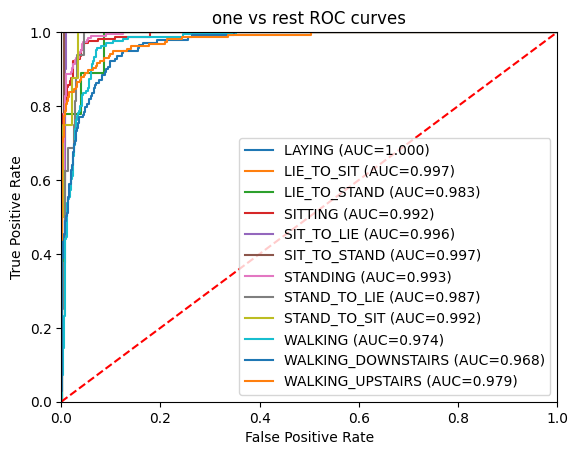

In [19]:
svm = tuner.SVM_tuner(target="qwk", kernel_seed=11, valid_seed = 222, optuna_seed = 3333).fit(x_train, y_train)
report_utils.classification_summary(y_valid, svm.predict_proba(x_valid))

optuna seed 3333  |  validation seed 222  |  model seed 11
    start tuning. it will take a while.
    optuna is better, best trial:  86

 
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       180
        LIE_TO_SIT       0.62      0.62      0.62         8
      LIE_TO_STAND       0.57      0.44      0.50         9
           SITTING       0.95      0.93      0.94       168
        SIT_TO_LIE       0.50      0.60      0.55        10
      SIT_TO_STAND       0.00      0.00      0.00         3
          STANDING       0.95      0.95      0.95       184
      STAND_TO_LIE       0.37      0.44      0.40        16
      STAND_TO_SIT       0.57      0.50      0.53         8
           WALKING       0.95      0.90      0.93       164
WALKING_DOWNSTAIRS       0.82      0.84      0.83       139
  WALKING_UPSTAIRS       0.88      0.92      0.90       155

          accuracy                           0.91      1044
         macro avg

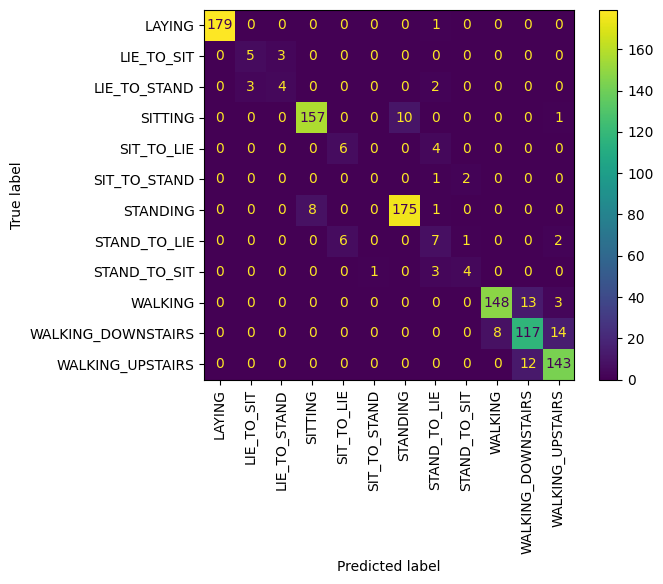

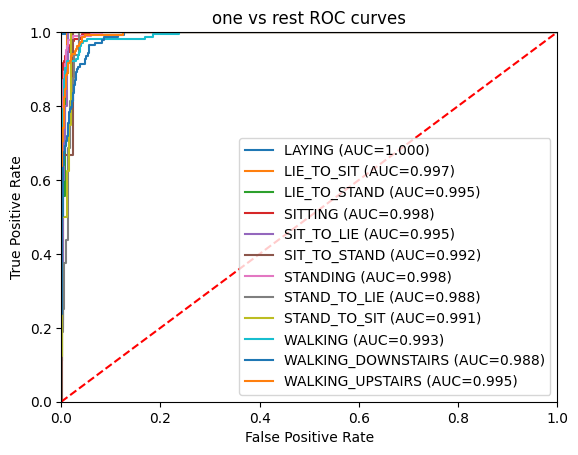

In [20]:
xgb = tuner.XGBoost_tuner(target="mcc", kernel_seed=11, valid_seed = 222, optuna_seed = 3333).fit(x_train, y_train)
report_utils.classification_summary(y_valid, xgb.predict_proba(x_valid))

optuna seed 3333  |  validation seed 222  |  model seed 11
    start tuning. it will take a while.
    optuna is better, best trial:  73

 
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       180
        LIE_TO_SIT       0.83      0.62      0.71         8
      LIE_TO_STAND       0.62      0.56      0.59         9
           SITTING       0.93      0.92      0.93       168
        SIT_TO_LIE       0.58      0.70      0.64        10
      SIT_TO_STAND       0.00      0.00      0.00         3
          STANDING       0.93      0.93      0.93       184
      STAND_TO_LIE       0.45      0.56      0.50        16
      STAND_TO_SIT       0.67      0.50      0.57         8
           WALKING       0.93      0.93      0.93       164
WALKING_DOWNSTAIRS       0.85      0.87      0.86       139
  WALKING_UPSTAIRS       0.90      0.90      0.90       155

          accuracy                           0.91      1044
         macro avg

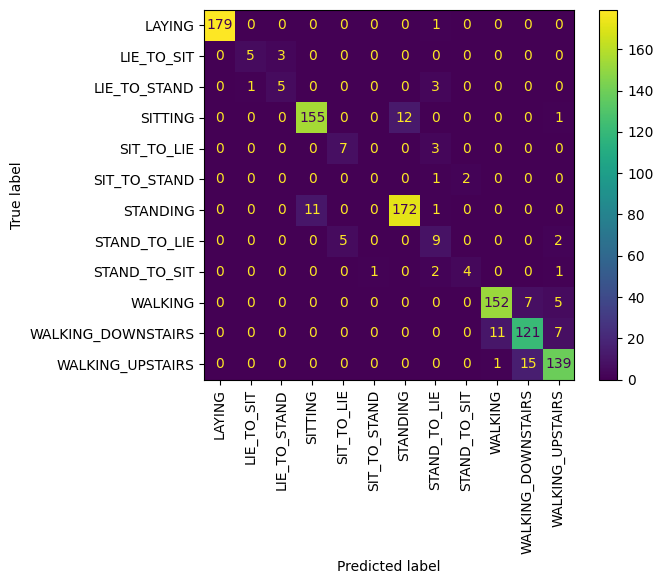

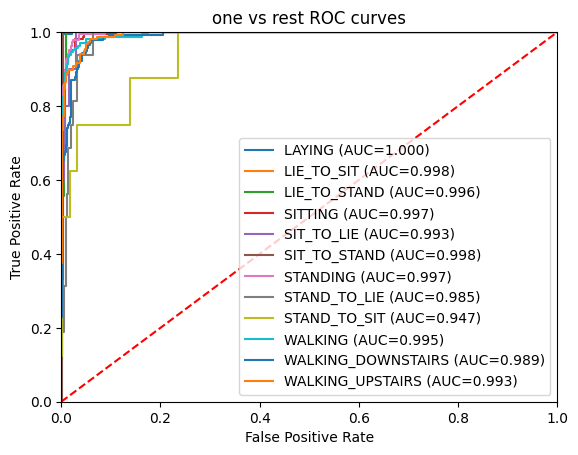

In [21]:
lgbm = tuner.LighGBM_tuner(target="balanced_accuracy", kernel_seed=11, valid_seed = 222, optuna_seed = 3333).fit(x_train, y_train)
report_utils.classification_summary(y_valid, lgbm.predict_proba(x_valid))

optuna seed 3333  |  validation seed 222  |  model seed 11
    start tuning. it will take a while.
    optuna is better, best trial:  15

 
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       180
        LIE_TO_SIT       1.00      0.12      0.22         8
      LIE_TO_STAND       0.46      0.67      0.55         9
           SITTING       0.94      0.79      0.86       168
        SIT_TO_LIE       0.50      0.60      0.55        10
      SIT_TO_STAND       0.33      0.67      0.44         3
          STANDING       0.83      0.93      0.88       184
      STAND_TO_LIE       0.38      0.56      0.45        16
      STAND_TO_SIT       0.33      0.38      0.35         8
           WALKING       0.66      0.73      0.69       164
WALKING_DOWNSTAIRS       0.64      0.58      0.61       139
  WALKING_UPSTAIRS       0.77      0.73      0.75       155

          accuracy                           0.79      1044
         macro avg

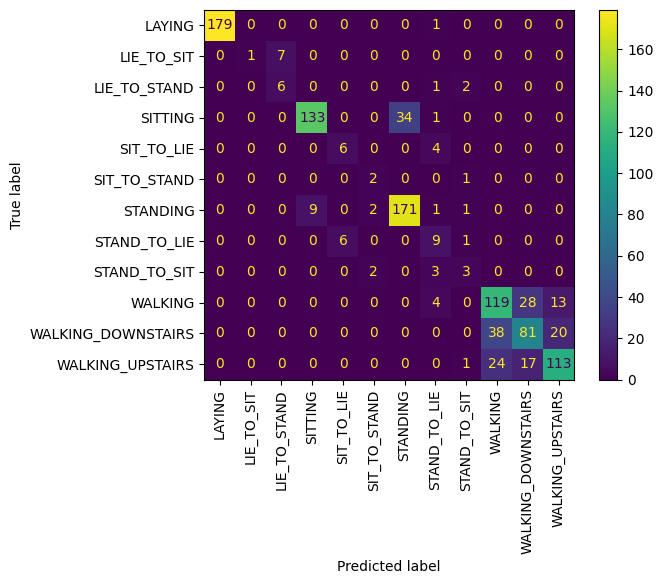

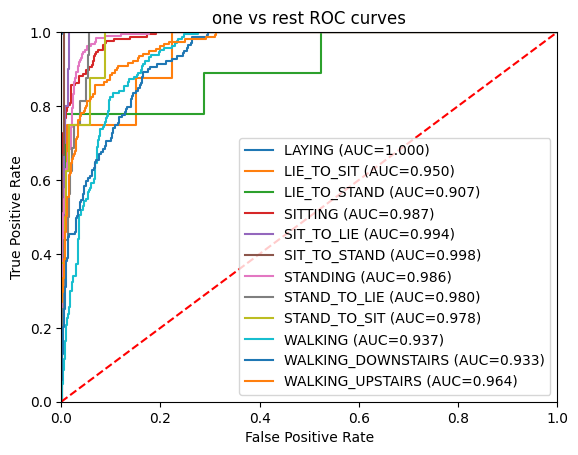

In [22]:
elasticnet = tuner.ElasticLogit_tuner(target = "log_loss", kernel_seed=11, valid_seed = 222, optuna_seed = 3333).fit(x_train, y_train)
report_utils.classification_summary(y_valid, elasticnet.predict_proba(x_valid)) 

### Mljar

from supervised.automl import AutoML

mljar = AutoML(mode = "Perform", results_path = output_folder+"MLjar")
mljar.fit(x_train, y_train)

report_utils.classification_summary(y_valid, mljar.predict_proba(x_valid)[:, 1])

# Output

In [23]:
# Save the result ro output_path
important_feature.to_csv(output_folder + export_title + " important feature.csv")
importance.to_csv(output_folder+export_title+ " importance.csv")

In [27]:
from PineBioML.IO import save_model
# save model
save_model(svm, save_path=output_folder+"models/", save_name=export_title+"SVM", overide=True)

example_basic SVM  has already exist in  ./output/models/
It will be overide.


# Reload model


 
                    precision    recall  f1-score   support

            LAYING       0.98      1.00      0.99       180
        LIE_TO_SIT       0.46      0.75      0.57         8
      LIE_TO_STAND       0.33      0.11      0.17         9
           SITTING       0.92      0.85      0.88       168
        SIT_TO_LIE       0.55      0.60      0.57        10
      SIT_TO_STAND       0.50      0.33      0.40         3
          STANDING       0.87      0.93      0.90       184
      STAND_TO_LIE       0.44      0.44      0.44        16
      STAND_TO_SIT       0.50      0.12      0.20         8
           WALKING       0.78      0.87      0.82       164
WALKING_DOWNSTAIRS       0.77      0.70      0.73       139
  WALKING_UPSTAIRS       0.85      0.84      0.84       155

          accuracy                           0.85      1044
         macro avg       0.66      0.63      0.63      1044
      weighted avg       0.85      0.85      0.84      1044



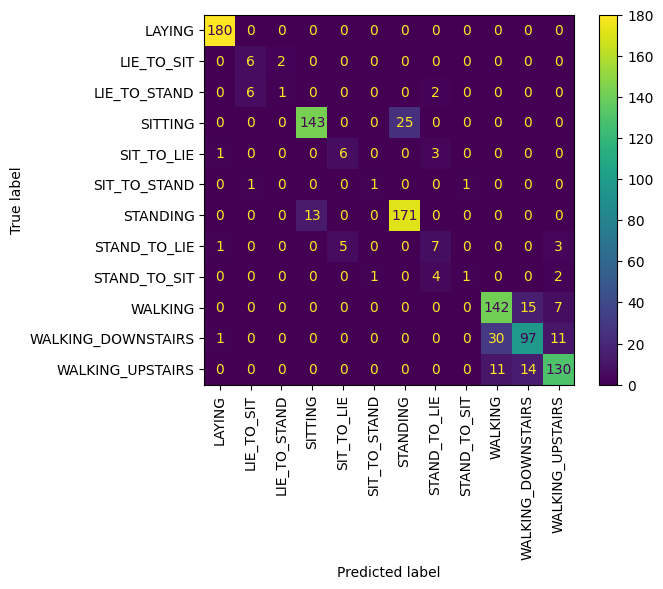

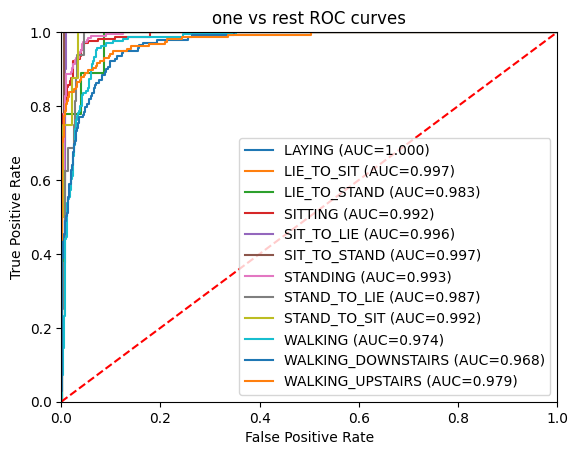

In [28]:
from PineBioML.IO import load_model
# load model
presaved_model = load_model(output_folder+"models/", export_title+"SVM")

report_utils.classification_summary(y_valid, presaved_model.predict_proba(x_valid)) 